In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#import data
path = r'C:\Users\Admin\Documents\Data Analytics Course\Achievement 4\08-2020 Instacart Basket Analysis'
ords_prods_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers.pkl'))

In [3]:
ords_prods_customers.head()

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,surname,gender,state,age,date_joined,no_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [4]:
ords_prods_customers['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [5]:
ords_prods_customers.describe()

,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,mean_order,median_since_prior_order,age,no_of_dependants,income
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,30328763.0,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.239973e+07,3.240486e+07,3.240486e+07,32404854.0,3.240486e+07,3.240486e+07,3.240486e+07
mean,1.710745e+06,1.714230e+01,2.738867e+00,1.342515e+01,NaN,2.559866e+04,8.352547e+00,5.895873e-01,6.449111e+01,9.919792e+00,7.790994e+00,3.305217e+01,7.218542e+00,NaN,4.946527e+01,1.501896e+00,9.943773e+04
std,9.872988e+05,1.753532e+01,2.090077e+00,4.246380e+00,0.0,1.408400e+04,7.127071e+00,4.919087e-01,4.843815e+01,6.281485e+00,4.241809e+00,2.515525e+01,8.977324e-01,0.0,1.848558e+01,1.118865e+00,4.305727e+04
min,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0,1.000000e+00,1.000000e+00,0.000000e+00,-1.280000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.559470e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.0,1.354400e+04,3.000000e+00,0.000000e+00,2.400000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.378489e+00,6.0,3.300000e+01,1.000000e+00,6.700400e+04
50%,1.711049e+06,1.100000e+01,3.000000e+00,1.300000e+01,8.0,2.530200e+04,6.000000e+00,1.000000e+00,7.900000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.811940e+00,8.0,4.900000e+01,2.000000e+00,9.661800e+04
75%,2.565499e+06,2.400000e+01,5.000000e+00,1.600000e+01,15.0,3.794700e+04,1.100000e+01,1.000000e+00,1.000000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.229327e+00,13.0,6.500000e+01,3.000000e+00,1.279120e+05
max,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,30.0,4.968800e+04,1.450000e+02,1.000000e+00,1.270000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.320000e+01,30.0,8.100000e+01,3.000000e+00,5.939010e+05


In [6]:
ords_prods_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   order_id                  int32   
 1   customer_id               object  
 2   order_number              int8    
 3   orders_day_of_week        int8    
 4   order_hour_of_day         int8    
 5   days_since_prior_order    float16 
 6   new_customer              bool    
 7   product_id                int32   
 8   add_to_cart_order         int32   
 9   reordered                 int8    
 10  _merge                    category
 11  product_name              object  
 12  aisle_id                  int8    
 13  department_id             int8    
 14  prices                    float64 
 15  price_label               object  
 16  busiest day               object  
 17  busiest_days              object  
 18  busiest_period_of_day     object  
 19  max_order                 int8    
 20  

## Question 2

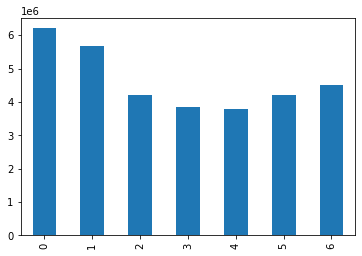

In [7]:
#creating bar chart of orders_day_of_week column
bar_dow = ords_prods_customers['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [8]:
#setting outlier prices as NaNs
ords_prods_customers.loc[ords_prods_customers['prices'] >100, 'prices'] = np.nan

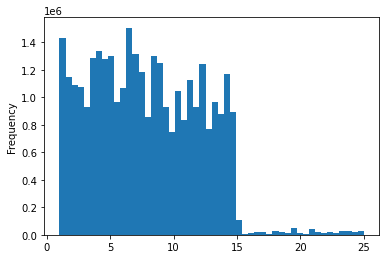

In [9]:
# creating histogram of prices column
hist_prices = ords_prods_customers['prices'].plot.hist(bins = 50)

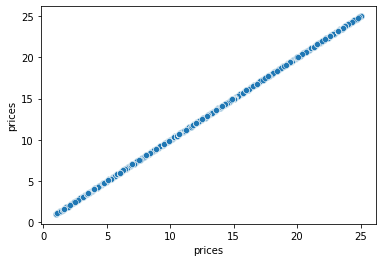

In [32]:
#creating scatterplot of prices column
sp_prices = sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_customers)

In [9]:
#setting up random sample to create a line chart
np.random.seed(4)
dev = np.random.rand(len(ords_prods_customers)) <= 0.7

In [10]:
# store 70% of sample in dataframe big
big = ords_prods_customers[dev]

In [11]:
#store 30% of sample in dataframe small
small = ords_prods_customers[~dev]

In [12]:
# reducing sample to only necessary columns
df = small[['orders_day_of_week','prices']]

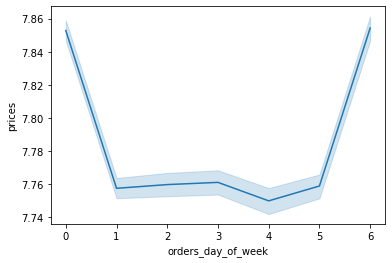

In [13]:
#creating line chart
line = sns.lineplot(data = df, x = 'orders_day_of_week',y = 'prices')

## Question 3

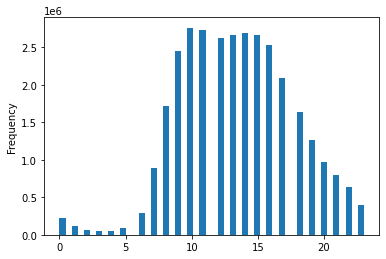

In [34]:
#creating a histogram of the “order_hour_of_day” column
hist_hrs = ords_prods_customers['order_hour_of_day'].plot.hist(bins = 50)

Most orders occur from mid morning to early evening. Early morning is the least busiest time.

## Question 4

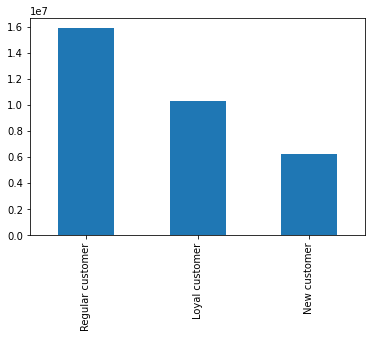

In [36]:
# Creating a bar chart from the “loyalty_flag”
bar_loyalty = ords_prods_customers['loyalty_flag'].value_counts().plot.bar()

## Question 5

In [19]:
#reducing sample df to necessary columns to check correlation between 'prices' and 'hour of day' columns
df_line_2 = small[['order_hour_of_day','prices']]

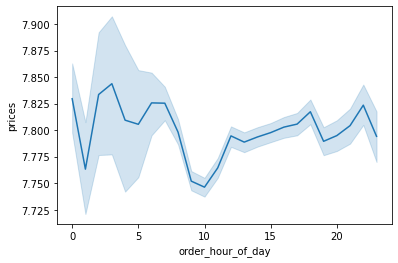

In [21]:
#creating a line chart from 'prices' and 'hour of day' columns
line_2 = sns.lineplot(data = df_line_2, x = 'order_hour_of_day',y = 'prices')

Even though earlier I stated that the early morning is the least busiest time, it looks like that is when customers spend the most money.

## Question 6

In [22]:
#reducing sample df to necessary columns to check correlation between 'age' and 'no_of_dependents' columns
df_line_3 = small[['age','no_of_dependants']]

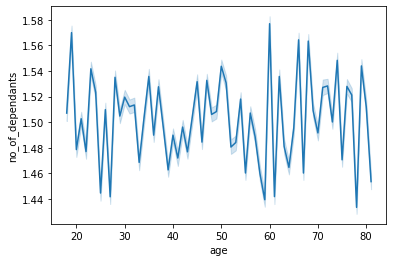

In [24]:
#creating a line chart from 'age' and 'no_of_dependents' columns
line_3 = sns.lineplot(data = df_line_3, x = 'age',y = 'no_of_dependants')

There seems to be no connection between customers' age and their number of dependents.

## Question 7

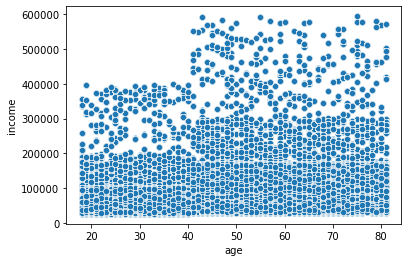

In [26]:
#scatterplot to check if theres a correlation btwn age and income
age_income_sp = sns.scatterplot(x = 'age', y = 'income',data = ords_prods_customers)

The scatterplot breaks down customers' spending power into two groups: 20-40 year olds and 40+ year olds. The 20-40 age group tends to have a max income of of 400,000 and most hover between 100,000-200,000. Meanwhile the 40+ age group sees maximums of around 600,000 and a majority hovering from 100,000 to 300,000. Overall, it seems like 40+ year olds have greater spending power.

## Question 8

In [29]:
#exporting bar chart 'bar_dow'
bar_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dow.png'))

In [31]:
#exporting histogram 'hist_prices'
hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [33]:
#exporting line chart of 'orders_day_of_week' and 'prices' column
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dow_prices.png'))

In [35]:
#exporting histogram 'hist_hrs'
hist_hrs.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_hours.png'))

In [37]:
#exporting bar chart 'bar_loyalty'
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [38]:
#exporting line chart of 'orders_hour_of_day' and 'prices' column
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_prices.png'))

In [39]:
#exporting line chart of 'age' and 'no_of_dependents' columns
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependents.png'))

In [40]:
#exporting scatterplot of 'age' and 'income' columns
age_income_sp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sp_age_income.png'))